## Preprocessing

In [58]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [59]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN','NAME'], 1)

C:\Users\Leah Nash\AppData\Local\Temp\ipykernel_16908\3500215911.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(['EIN','NAME'], 1)


In [60]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [61]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [62]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

# application_types_to_replace = [application_df['APPLICATION_TYPE'].value_counts()>275].index
app_type = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = list(app_type[app_type<=550].index)


# Replace in dataframe
for app in application_types_to_replace:

       application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [63]:
# Look at CLASSIFICATION value counts for binning
app_class = application_df['CLASSIFICATION'].value_counts()
app_class

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [64]:
# You may find it helpful to look at CLASSIFICATION value counts >1
app_class[app_class>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [65]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(app_class[app_class <=1000].index)


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()



C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [66]:
ask_value = application_df["ASK_AMT"].value_counts()

# ask_amount_all = list(ask_value.index)
ask_value 

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

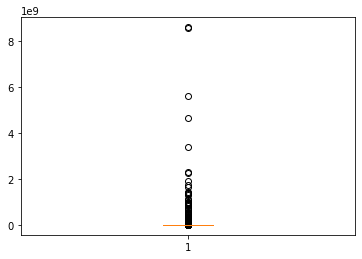

In [67]:
# figure out of there are outliers
fig1, ax1 = plt.subplots()
ax1.boxplot(application_df["ASK_AMT"])
plt.show()

In [68]:
#keep anything less than 3000000000
application_df = application_df[application_df["ASK_AMT"]<3000000000]
# new_application_df["ASK_AMT"].value_counts()


In [69]:
# Check to make sure it worked
application_df["ASK_AMT"].max(),  application_df["ASK_AMT"].value_counts()


(2310256039,
 5000        25398
 6725            3
 63981           3
 15583           3
 10478           3
             ...  
 30060           1
 43091152        1
 18683           1
 54441           1
 36500179        1
 Name: ASK_AMT, Length: 8742, dtype: int64)

In [70]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, columns=["INCOME_AMT","APPLICATION_TYPE","AFFILIATION","CLASSIFICATION","USE_CASE","ORGANIZATION","SPECIAL_CONSIDERATIONS"])
application_df 

,STATUS,ASK_AMT,IS_SUCCESSFUL,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,1,108590,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,1,5000,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
34295,1,5000,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
34296,1,5000,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
34297,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [71]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop("IS_SUCCESSFUL",axis='columns').values
y = application_df["IS_SUCCESSFUL"].values



# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [72]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [94]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
feature_number = len(X_train[0])
layer_one_nodes = 120
layer_two_nodes = 60
layer_outer_nodes= 1

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer_one_nodes, activation="relu", input_dim=feature_number))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer_two_nodes, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=layer_outer_nodes, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 120)               5160      
                                                                 
 dense_60 (Dense)            (None, 60)                7260      
                                                                 
 dense_61 (Dense)            (None, 1)                 61        
                                                                 
Total params: 12,481
Trainable params: 12,481
Non-trainable params: 0
_________________________________________________________________


In [95]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [96]:
# Train the model
nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5686 - accuracy: 0.7220
Epoch 2/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5554 - accuracy: 0.7290
Epoch 3/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5527 - accuracy: 0.7295
Epoch 4/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5509 - accuracy: 0.7315
Epoch 5/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5497 - accuracy: 0.7335
Epoch 6/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5483 - accuracy: 0.7314
Epoch 7/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5474 - accuracy: 0.7330
Epoch 8/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5469 - accuracy: 0.7329
Epoch 9/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5458 - accuracy: 0.7351
Epoch 10/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5459 - accura

804/804 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7411
Epoch 82/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7410
Epoch 83/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5344 - accuracy: 0.7406
Epoch 84/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5341 - accuracy: 0.7407
Epoch 85/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5336 - accuracy: 0.7407
Epoch 86/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5344 - accuracy: 0.7406
Epoch 87/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5334 - accuracy: 0.7410
Epoch 88/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5336 - accuracy: 0.7417
Epoch 89/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5338 - accuracy: 0.7409
Epoch 90/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5334 - accuracy: 

804/804 [==============================] - 1s 2ms/step - loss: 0.5309 - accuracy: 0.7423
Epoch 161/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5314 - accuracy: 0.7428
Epoch 162/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5309 - accuracy: 0.7430
Epoch 163/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5309 - accuracy: 0.7425
Epoch 164/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5324 - accuracy: 0.7422
Epoch 165/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5303 - accuracy: 0.7422
Epoch 166/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5310 - accuracy: 0.7424
Epoch 167/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5311 - accuracy: 0.7421
Epoch 168/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5311 - accuracy: 0.7427
Epoch 169/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5304 - a

In [97]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.4188 - accuracy: 0.7271 - 357ms/epoch - 1ms/step
Loss: 1.4187778234481812, Accuracy: 0.7270818948745728


In [93]:
# Export our model to HDF5 file

nn.save("AlphabetSoupCharityOptimization.h5")
